# ETL Pipeline Preparation
Follow the instructions below to help you create your ETL pipeline.
### 1. Import libraries and load datasets.
- Import Python libraries
- Load `messages.csv` into a dataframe and inspect the first few lines.
- Load `categories.csv` into a dataframe and inspect the first few lines.

In [1]:
# import libraries
import pandas as pd
import numpy as np
from sqlalchemy import create_engine


In [2]:
# load messages dataset
messages = pd.read_csv('disaster_response_pipeline_project/data/disaster_messages.csv')
messages.head()

,id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct


In [3]:
# load categories dataset
categories = pd.read_csv('disaster_response_pipeline_project/data/disaster_categories.csv')
categories.head()

,id,categories
0,2,related-1;request-0;offer-0;aid_related-0;medi...
1,7,related-1;request-0;offer-0;aid_related-1;medi...
2,8,related-1;request-0;offer-0;aid_related-0;medi...
3,9,related-1;request-1;offer-0;aid_related-1;medi...
4,12,related-1;request-0;offer-0;aid_related-0;medi...


### 2. Merge datasets.
Merge the messages and categories datasets using the common id
Assign this combined dataset to df, which will be cleaned in the following steps

In [4]:
# merge datasets
df = messages.merge(categories, how = 'left', on = 'id')
df.head()

,id,message,original,genre,categories
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,related-1;request-0;offer-0;aid_related-0;medi...
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,related-1;request-0;offer-0;aid_related-1;medi...
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,related-1;request-0;offer-0;aid_related-0;medi...
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,related-1;request-1;offer-0;aid_related-1;medi...
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,related-1;request-0;offer-0;aid_related-0;medi...


### 3. Split categories into separate category columns.
Split the values in the categories column on the ; character so that each value becomes a separate column. You'll find this method very helpful! Make sure to set expand=True.
Use the first row of categories dataframe to create column names for the categories data.
Rename columns of categories with new column names.

In [5]:
# create a dataframe of the 36 individual category columns
categories = df['categories'].str.split(pat = ';', expand = True)
categories.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
1,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
3,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
4,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


In [6]:
# select the first row of the categories dataframe
row = categories.iloc[0]
# use this row to extract a list of new column names for categories.
# one way is to apply a lambda function that takes everything 
# up to the second to last character of each string with slicing
category_colnames = []
for col in row.unique():
    category_colnames.append(col[0:len(col)-2])

print(category_colnames)

['related', 'request', 'offer', 'aid_related', 'medical_help', 'medical_products', 'search_and_rescue', 'security', 'military', 'child_alone', 'water', 'food', 'shelter', 'clothing', 'money', 'missing_people', 'refugees', 'death', 'other_aid', 'infrastructure_related', 'transport', 'buildings', 'electricity', 'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure', 'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold', 'other_weather', 'direct_report']


In [7]:
# rename the columns of `categories`
categories.columns = category_colnames
categories.head()

categories['related'].astype('str').str[-1]

0        1
1        1
2        1
3        1
4        1
5        0
6        1
7        1
8        0
9        1
10       1
11       0
12       1
13       1
14       1
15       1
16       1
17       0
18       0
19       1
20       1
21       1
22       1
23       1
24       1
25       0
26       1
27       1
28       1
29       1
        ..
26356    1
26357    1
26358    1
26359    0
26360    0
26361    1
26362    1
26363    1
26364    1
26365    0
26366    1
26367    1
26368    1
26369    1
26370    0
26371    1
26372    1
26373    1
26374    0
26375    1
26376    1
26377    1
26378    1
26379    0
26380    1
26381    0
26382    0
26383    1
26384    1
26385    1
Name: related, Length: 26386, dtype: object

### 4. Convert category values to just numbers 0 or 1.
Iterate through the category columns in df to keep only the last character of each string (the 1 or 0). For example, related-0 becomes 0, related-1 becomes 1. Convert the string to a numeric value.
You can perform normal string actions on Pandas Series, like indexing, by including .str after the Series. You may need to first convert the Series to be of type string, which you can do with astype(str).

In [8]:
for column in categories:
    # set each value to be the last character of the string
    categories[column] = categories[column].astype('str').str[-1]
    # convert column from string to numeric
    categories[column] = pd.to_numeric(categories[column])
categories.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 5. Replace categories column in df with new category columns.
Drop the categories column from the df dataframe since it is no longer needed.
Concatenate df and categories data frames.

In [9]:
# drop the original categories column from `df`
df = df.drop(columns=['categories'], axis = 1)
#df = pd.concat(df, categories)
df.head()

,id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct


In [10]:
# concatenate the original dataframe with the new `categories` dataframe
df = pd.concat([df, categories], axis = 1)
df.head()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 6. Remove duplicates.
Check how many duplicates are in this dataset.
Drop the duplicates.
Confirm duplicates were removed.

In [11]:
# check number of duplicates
df.duplicated().sum()

170

In [12]:
# drop duplicates
df = df.drop_duplicates()

In [13]:
# check number of duplicates
df.duplicated().sum()

0

### 7. Save the clean dataset into an sqlite database.
You can do this with pandas [`to_sql` method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_sql.html) combined with the SQLAlchemy library. Remember to import SQLAlchemy's `create_engine` in the first cell of this notebook to use it below.

In [15]:
#engine = create_engine('sqlite:///InsertDatabaseName.db')
df.to_sql('InsertTableName', engine, index=False)

ValueError: Table 'InsertTableName' already exists.

### 8. Use this notebook to complete etl_pipeline.py
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database based on new datasets specified by the user. Alternatively, you can complete etl_pipeline.py in the classroom on the Project Workspace IDE coming later.

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

target_columns = category_colnames

g = pd.DataFrame(df[target_columns].sum().sort_values(ascending = False))
g = g.reset_index()
g['total_counts'] = g[0]
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

In [33]:

g.plot.bar(x = 'index', y = 'total_counts', title = 'Number of Messages Per Category')


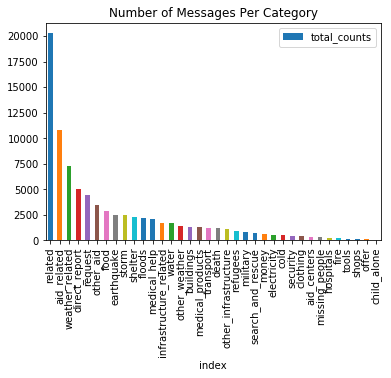

In [34]:
plt.show()

In [26]:
g['total_counts'].describe()

count       36.000000
mean      2314.527778
std       3784.370953
min          0.000000
25%        454.500000
50%       1197.500000
75%       2346.250000
max      20282.000000
Name: total_counts, dtype: float64

In [28]:
import json
import plotly
import plotly.graph_objects as go

import pandas as pd

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from flask import Flask
from flask import render_template, request, jsonify
from plotly.graph_objs import Bar
from sklearn.externals import joblib
from sqlalchemy import create_engine

In [61]:
genre_counts = df.groupby('genre').count()['message']
genre_names = list(genre_counts.index)
    
    #second bar chart data extraction
df_target_counts = pd.DataFrame(df[target_columns].sum().sort_values(ascending = False))
df_target_counts = df_target_counts.reset_index()
df_target_counts['total_counts'] = df_target_counts[0]
category_names = df_target_counts['index']
category_counts = df_target_counts['total_counts']

cat_names = []

for name in category_names:
    cat_names.append(str(name))

In [63]:
cat_names

['related',
 'aid_related',
 'weather_related',
 'direct_report',
 'request',
 'other_aid',
 'food',
 'earthquake',
 'storm',
 'shelter',
 'floods',
 'medical_help',
 'infrastructure_related',
 'water',
 'other_weather',
 'buildings',
 'medical_products',
 'transport',
 'death',
 'other_infrastructure',
 'refugees',
 'military',
 'search_and_rescue',
 'money',
 'electricity',
 'cold',
 'security',
 'clothing',
 'aid_centers',
 'missing_people',
 'hospitals',
 'fire',
 'tools',
 'shops',
 'offer',
 'child_alone']

In [64]:
 graphs = [
        {
            'data': [
                Bar(
                    x=genre_names,
                    y=genre_counts
                )
            ],

            'layout': {
                'title': 'Distribution of Message Genres',
                'yaxis': {
                    'title': "Count"
                },
                'xaxis': {
                    'title': "Genre"
                }
            }
        },

        {
            'data': [
                Bar(
                    x=cat_names,
                    y=category_counts
                )
            ],

            'layout': {
                'title': 'Distribution of Message Categories',
                'yaxis': {
                    'title': "Count"
                },
                'xaxis': {
                    'title': "Category"
                }
            }
        }
    ]
    
    # encode plotly graphs in JSON
ids = ["graph-{}".format(i) for i, _ in enumerate(graphs)]

In [65]:
graphs

[{'data': [Bar({
       'x': ['direct', 'news', 'social'], 'y': array([10766, 13054,  2396])
   })],
  'layout': {'title': 'Distribution of Message Genres',
   'xaxis': {'title': 'Genre'},
   'yaxis': {'title': 'Count'}}},
 {'data': [Bar({
       'x': [related, aid_related, weather_related, direct_report, request,
             other_aid, food, earthquake, storm, shelter, floods, medical_help,
             infrastructure_related, water, other_weather, buildings,
             medical_products, transport, death, other_infrastructure, refugees,
             military, search_and_rescue, money, electricity, cold, security,
             clothing, aid_centers, missing_people, hospitals, fire, tools, shops,
             offer, child_alone],
       'y': array([20282, 10860,  7297,  5075,  4474,  3446,  2923,  2455,  2443,  2314,
                    2155,  2084,  1705,  1672,  1376,  1333,  1313,  1201,  1194,  1151,
                     875,   860,   724,   604,   532,   530,   471,   405,   309

In [68]:
graphs[1]['data']

[Bar({
     'x': [related, aid_related, weather_related, direct_report, request,
           other_aid, food, earthquake, storm, shelter, floods, medical_help,
           infrastructure_related, water, other_weather, buildings,
           medical_products, transport, death, other_infrastructure, refugees,
           military, search_and_rescue, money, electricity, cold, security,
           clothing, aid_centers, missing_people, hospitals, fire, tools, shops,
           offer, child_alone],
     'y': array([20282, 10860,  7297,  5075,  4474,  3446,  2923,  2455,  2443,  2314,
                  2155,  2084,  1705,  1672,  1376,  1333,  1313,  1201,  1194,  1151,
                   875,   860,   724,   604,   532,   530,   471,   405,   309,   298,
                   283,   282,   159,   120,   118,     0])
 })]